In [210]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm

In [211]:
df = pd.read_csv("../../Datasets/Bouletta/EtsySoldOrderItems2020-2021-2022.csv")

In [212]:
df.head(2)

,Item Model,Quantity,Price,Coupon Code,Ship Country,Season,Month,Year,Color
0,4,1,44.67,1,1,0,12,2020,2.0
1,1,1,52.00,1,1,0,12,2020,1.0


In [213]:
dummy_season = pd.read_csv("../../Datasets/Bouletta/Dummy_GroupedBySeason.csv")

In [214]:
dummy_season.head(2)

,Season,Quantity,Price,Coupon Code,Ship Country,Year,Color,AirPods,AirTag,Apple iPhone X/XS,...,iPhone 11 Pro Max,iPhone 12,iPhone 13 Pro,iPhone 13 Series,iPhone 14 Series,iPhone 7/8,iPhone SE,iPhone X,iPhone X/XS,iPhone XS MAX
0,Fall,585,43132.99,582,1639,1176087,1207.0,1,0,5,...,7,112,8,59,4,3,11,0,0,0
1,Spring,491,33449.45,489,1126,988283,1121.0,0,1,5,...,5,69,8,21,0,11,16,0,0,1


In [215]:
dummy_season = dummy_season.drop(columns=["Year","Quantity","Price","Coupon Code","Ship Country","Color"])

In [216]:
s = dummy_season.groupby(['Season'], as_index=True).sum()

In [217]:
s

,AirPods,AirTag,Apple iPhone X/XS,Apple iPhone XR,Apple iPhone XS MAX,Card Holder,Custom order,Desk Mat,Galaxy N10,Galaxy Note 10 Plus,...,iPhone 11 Pro Max,iPhone 12,iPhone 13 Pro,iPhone 13 Series,iPhone 14 Series,iPhone 7/8,iPhone SE,iPhone X,iPhone X/XS,iPhone XS MAX
Season,,,,,,,,,,,,,,,,,,,,,
Fall,1,0,5,6,1,38,1,32,2,9,...,7,112,8,59,4,3,11,0,0,0
Spring,0,1,5,9,2,25,0,28,3,14,...,5,69,8,21,0,11,16,0,0,1
Summer,4,0,6,12,0,52,1,56,1,33,...,6,33,10,19,0,6,25,0,0,0
Winter,9,1,3,7,3,31,0,29,0,12,...,17,116,2,44,5,8,4,1,5,0


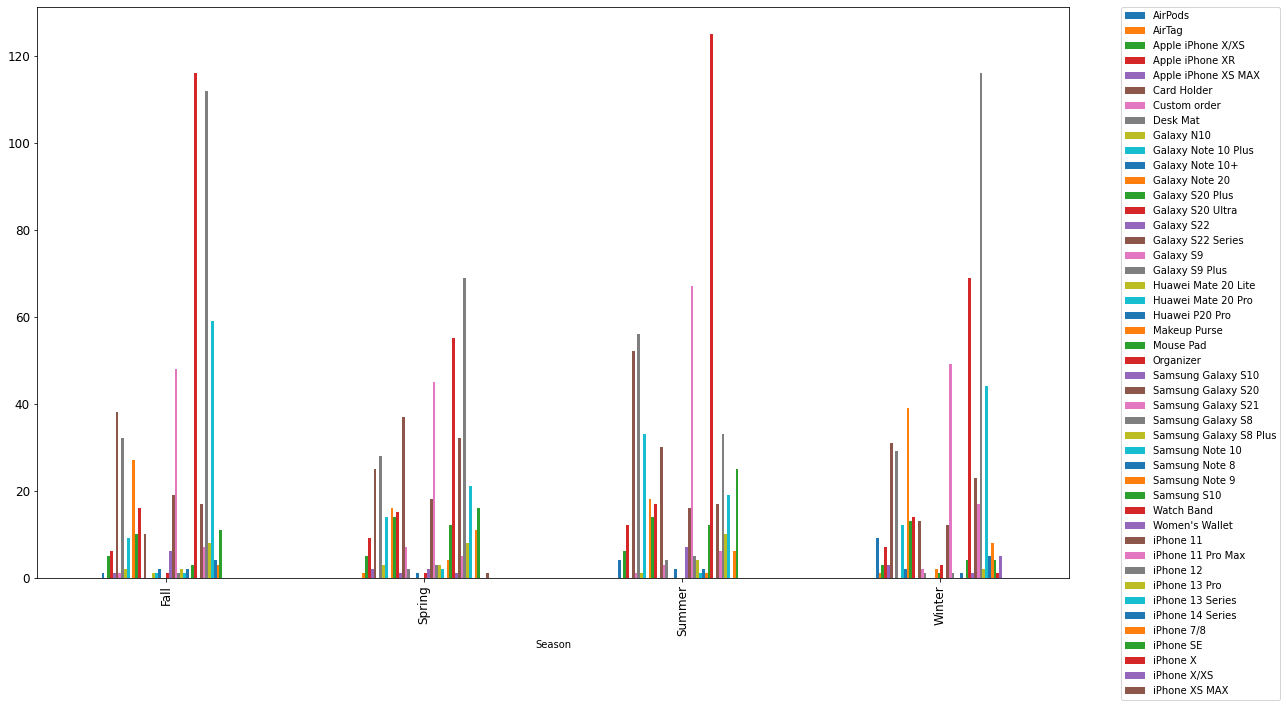

In [218]:
s.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tick_params(labelsize='large')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

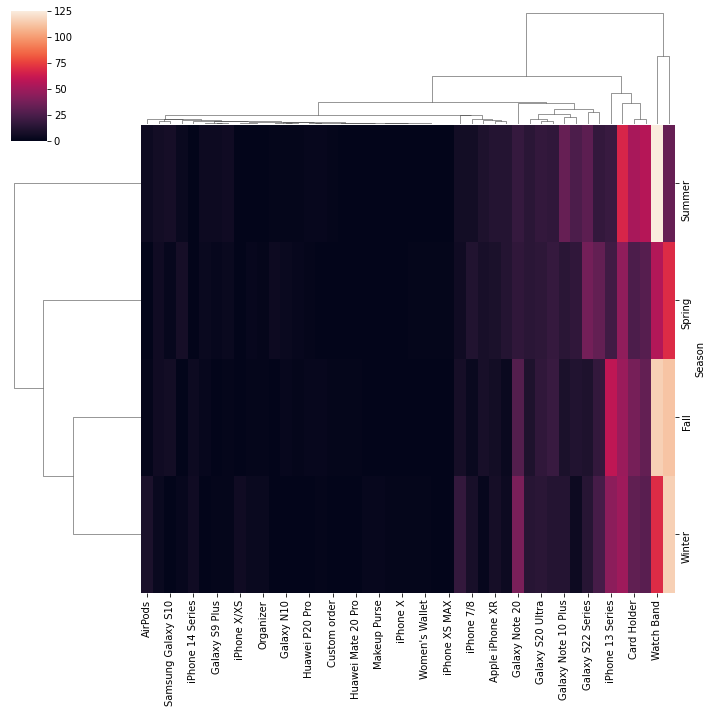

In [219]:
g = sns.clustermap(s)

In [220]:
dummy_drop = df.drop(columns=["Year","Quantity","Price","Coupon Code","Ship Country","Color"])

In [221]:
dummy_drop

,Item Model,Season,Month
0,4,0,12
1,1,0,12
2,5,0,12
3,1,0,12
4,7,0,12
...,...,...,...
2222,12,0,1
2223,24,0,1
2224,12,0,1
2225,7,0,1


In [222]:
dummy_df = pd.read_csv("../../Datasets/Bouletta/Dummy.csv")

In [223]:
dummy_df['Samsung Galaxy S21'].value_counts()

0    2018
1     209
Name: Samsung Galaxy S21, dtype: int64

In [224]:
band_df = dummy_df[["Samsung Galaxy S21","Winter","Summer","Spring","Fall"]]

In [225]:
band_df.head()

,Samsung Galaxy S21,Winter,Summer,Spring,Fall
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [226]:
seasons_count = pd.read_csv("../../Datasets/Bouletta/EtsySoldOrderItems2020-2021-2022.csv")

In [227]:
reversed_seasons = {0:'Winter', 1:'Spring', 2:'Summer',3: 'Fall'}
seasons_count['Season'] = seasons_count['Season'].map(reversed_seasons)

<AxesSubplot:>

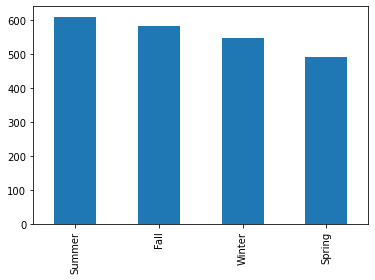

In [228]:
seasons_count["Season"].value_counts().plot(kind='bar')

There is not much difference between the total sales of the seasons

In [229]:
band_df.corr()

,Samsung Galaxy S21,Winter,Summer,Spring,Fall
Samsung Galaxy S21,1.000000,-0.008353,0.034015,-0.003317,-0.023199
Winter,-0.008353,1.000000,-0.350073,-0.302669,-0.339404
Summer,0.034015,-0.350073,1.000000,-0.325424,-0.364920
Spring,-0.003317,-0.302669,-0.325424,1.000000,-0.315506
Fall,-0.023199,-0.339404,-0.364920,-0.315506,1.000000


Percentage of sales in the summer for Samsung Galaxy S21 vs. other categories

In [230]:
band_df.groupby("Samsung Galaxy S21")['Summer'].mean()

Samsung Galaxy S21
0    0.268583
1    0.320574
Name: Summer, dtype: float64

Percentage of sales in the winter for Samsung Galaxy S21 vs. other categories

In [231]:
band_df.groupby("Samsung Galaxy S21")['Winter'].mean()

Samsung Galaxy S21
0    0.246779
1    0.234450
Name: Winter, dtype: float64

Percentage of sales in the spring for Samsung Galaxy S21 vs. other categories

In [232]:
band_df.groupby("Samsung Galaxy S21")['Spring'].mean()

Samsung Galaxy S21
0    0.220020
1    0.215311
Name: Spring, dtype: float64

Percentage of sales in the fall for Samsung Galaxy S21 vs. other categories

In [233]:
band_df.groupby("Samsung Galaxy S21")['Fall'].mean()

Samsung Galaxy S21
0    0.264618
1    0.229665
Name: Fall, dtype: float64

In [234]:
X = np.array(band_df[['Samsung Galaxy S21']]).reshape(-1,1)
y= band_df['Summer']

In [237]:
lm = LogisticRegression(C=100000)

In [238]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [239]:
lm.fit(X,y)

LogisticRegression(C=100000)

In [240]:
print(list(zip(["Summer"],lm.coef_[0])))

[('Summer', 0.25069811070666154)]


The coefficient is positive which means that the variable has a positive relationship with the outcome. Specifically, in the summer season, the log odds of selling a Samsung Galaxy S21 multiply by 0.25 vs. other seasons

In [241]:
#exponentiate so that the result is in terms of odds, not log of odds
np.exp(lm.coef_[0])

array([1.28492212])

By exponentiating the coefficient, we can say the odds of selling a Samsung Galaxy S21 item multiplies by 1.28 for the summer season vs. other seasons

In [242]:
#What are the odds of selling other items in summer?
print("Odds of selling other item categories in summer: %f" % np.exp(lm.intercept_ ))

Odds of selling other item categories in summer: 0.367208


In [243]:
#What are the odds of selling wedding items in summer?
print("Odds of selling Samsung Galaxy S21 items in summer: %f" % np.exp(lm.intercept_ + lm.coef_[0] ))

Odds of selling Samsung Galaxy S21 items in summer: 0.471834


In [244]:
odds_ratio= np.exp(lm.intercept_ + lm.coef_[0] ) / np.exp(lm.intercept_ )
print("Relative Increase of Odds of selling an item in the summer if Samsung Galaxy S21 item vs. another category of item: %f" % odds_ratio)

Relative Increase of Odds of selling an item in the summer if Samsung Galaxy S21 item vs. another category of item: 1.284922


In [245]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [246]:
# y_pred = log_model.predict(X_test)

In [247]:
# # Plot confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True)
# plt.xlabel("Predicted label")
# plt.ylabel("True label")
# plt.title("Confusion Matrix")
# plt.show()

In [248]:
#set our predictor to just be one row of a wedding item
observation = [1]
observation = np.array(observation).reshape(-1,1)

#tell the trained logistic regression object to predict the probability of that observation 
#belonging to class 0 and the probability of that observation belonging to class 1
predictions = lm.predict_proba(observation)
predictions

array([[0.67942461, 0.32057539]])

Our model gives that item a 68% chance of selling in seasons other than summer, and a 32% chance of selling in the summer. This probability corresponds to the data, where 32% of Samsung Galaxy S21 items sold were in the summer